In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data=pd.read_csv("D:\cardio_train.csv")

In [21]:
data.head()

,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
1,1;20228;1;156;85.0;140;90;3;1;0;0;1;1
2,2;18857;1;165;64.0;130;70;3;1;0;0;0;1
3,3;17623;2;169;82.0;150;100;1;1;0;0;1;1
4,4;17474;1;156;56.0;100;60;1;1;0;0;0;0


In [23]:
data.shape

(70000, 1)

In [9]:
#Data Preprocessing

In [9]:
# Spliting the single column into multiple columns using the semicolon (;) delimiter

In [25]:
data = data["id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio"].str.split(';', expand=True)

In [27]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [29]:
# Assigning proper column names

In [31]:
data.columns = ["id", "age", "gender", "height", "weight", "ap_hi", "ap_lo", 
                "cholesterol", "gluc", "smoke", "alco", "active", "cardio"]

In [17]:
# Converting all columns to appropriate data types

In [33]:
data = data.apply(pd.to_numeric, errors='coerce')

In [34]:
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index([], dtype='object')


In [41]:
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [43]:
data.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [45]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [47]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [49]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
data["height"].unique()

array([168, 156, 165, 169, 151, 157, 178, 158, 164, 173, 181, 172, 170,
       154, 162, 163, 153, 159, 166, 155, 160, 175, 171, 152, 187, 148,
       179, 180, 188, 185, 167, 183, 174, 176, 161, 184, 177, 182,  76,
       149, 142, 150, 144, 147, 186, 146, 141, 195, 140, 198, 145, 143,
       196, 138, 194, 190, 134, 136, 100, 120, 189, 137, 192, 122, 250,
       191, 117,  70,  97, 119, 130, 110, 193,  75, 132,  71, 135,  67,
       125, 139, 133,  74,  98, 112, 207,  68,  55,  81,  80,  64,  91,
        60, 109,  72, 197,  65, 128, 105, 108, 200, 104, 111, 113,  96,
       131,  59,  66,  99,  57], dtype=int64)

In [23]:
data["weight"].unique()

array([ 62.  ,  85.  ,  64.  ,  82.  ,  56.  ,  67.  ,  93.  ,  95.  ,
        71.  ,  68.  ,  80.  ,  60.  ,  78.  , 112.  ,  75.  ,  52.  ,
        83.  ,  69.  ,  90.  ,  45.  ,  65.  ,  59.  ,  66.  ,  74.  ,
       105.  ,  73.  ,  55.  ,  70.  ,  72.  ,  63.  ,  50.  , 107.  ,
        84.  ,  77.  ,  79.  ,  76.  ,  58.  , 115.  ,  97.  ,  53.  ,
        57.  ,  49.  , 110.  ,  94.  ,  92.  ,  87.  , 103.  ,  88.  ,
        99.  , 100.  ,  61.  ,  48.  ,  54.  ,  51.  ,  47.  ,  91.  ,
       104.  ,  81.  ,  98.  , 108.  ,  89.  , 101.  ,  86.  ,  65.5 ,
       142.  ,  96.  ,  44.  ,  41.  , 169.  , 116.  , 200.  ,  64.8 ,
       120.  , 117.  , 125.  , 106.  , 114.  , 113.  , 129.  , 124.  ,
        42.  , 123.  , 111.  , 102.  , 109.  ,  46.  , 139.  , 150.  ,
       138.  , 131.  ,  43.  ,  83.6 , 134.  , 106.5 , 121.  ,  40.  ,
       141.  , 119.  , 126.  , 177.  , 165.  , 122.  ,  62.3 , 118.  ,
        89.5 , 132.  , 155.  , 130.  , 159.  ,  84.6 , 140.  ,  82.3 ,
      

In [33]:
data["ap_hi"].unique()

array([  110,   140,   130,   150,   100,   120,   145,   170,   135,
         125,    90,   180,   160,   133,   190,    80,   122,   169,
         126,   158,   200,    14,   123,    70,   161,   147,   115,
         137,   153,    11,   148,   105,   220,   119,   141,   165,
         164,    12,   124,   172,   902,   162,   906,   117,   134,
         166,   210,   176,   116,    10,   121,    16,   112,   159,
         113,   118,   155,   142,   131,   157,   136,   146,   138,
        -100,   909,   109,    85,   106,   129,    93,     7,    95,
         179,   156,   168,   132,   104,   103,   178,   175,   128,
         151,    15,   139, 11500,   127,    17,   108,   144,   102,
           1,  1420,    13,   143,   701,   107,   184,   149,   167,
         114,   101,    60,  1500,   181,   171,   202,  -115,   111,
         907,    20,   188,   185,   163,   173,   154,   177,  -140,
         174,  -120, 14020,  1400,   240,   191,   197,  1620,   152,
          96,   199,

In [25]:
data["ap_lo"].unique()

array([   80,    90,    70,   100,    60,    85,    89,   110,    65,
          63,    79,  1100,  1000,   800,   120,    50,    30,   109,
          84,  1033,   150,    91,    40,    73,    78,    75,    86,
          87,  1001,    82,    95,    69,    74,    97,    81,  1200,
          83,   119,     0,    93,   105, 10000,    99,    77,    59,
        8044,   140,    92,  1044,   108,   125,   115,    68,    61,
         106,   102,    94,    66,    52,   170,    76,   160,    62,
          96,   130,   113,    67,  9100,    10,    88,   902,     8,
         112,   104,    71,    72,  1008,    98,  2088,    20,   802,
        8000,  1022,   850,   708,    57,   101,  9011,  1011,    64,
        1007,  1177,  7100,    45,   709,  8500,    58,  1110,  8099,
        1088,   126,  1077,  1120,     7,   103,  1125,   180,   121,
        8100,   710,  5700,  8079,  1111,  1003,     6,  1900,   809,
         114,   801,  1002,    53,   111,     1,   118,    56,   182,
         810,     9,

In [37]:
#Handling anomalies in the dataset by applying realistic thresholds for ap_hi, ap_lo, height, weight

In [51]:
data1 = data[
    (data["ap_hi"].between(90, 200)) &      # Systolic blood pressure: 90-200
    (data["ap_lo"].between(60, 140)) &     # Diastolic blood pressure: 60-140
     (data["height"].between(120, 220)) &   # Height: 120-220 cm
    (data["weight"].between(30, 150))       # Weight: 30-150 kg
]

In [29]:
data1.shape

(68362, 13)

In [31]:
data1.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [45]:
# Adding an age column (convert age from days to years)

In [53]:
data1["Age"] = (data["age"] / 365).astype(int)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2624\1992376638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["Age"] = (data["age"] / 365).astype(int)


In [23]:
data1.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47


In [55]:
data1.drop(columns=["age"],inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2624\3844047669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.drop(columns=["age"],inplace=True)


In [57]:
data1.describe()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age
count,68362.000000,68362.000000,68362.000000,68362.000000,68362.000000,68362.000000,68362.000000,68362.000000,68362.000000,68362.000000,68362.000000,68362.000000,68362.000000
mean,49972.997089,1.348776,164.417264,74.067861,126.650449,81.356806,1.364486,1.225754,0.087900,0.053407,0.803385,0.494968,52.832963
std,28844.513791,0.476586,7.902724,14.072564,16.415608,9.317085,0.678956,0.571774,0.283151,0.224845,0.397442,0.499978,6.766121
min,0.000000,1.000000,120.000000,30.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000
25%,25007.250000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50008.500000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000
75%,74867.750000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,2.000000,207.000000,150.000000,200.000000,140.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000


In [39]:
data1.reset_index(drop=True, inplace=True)

In [41]:
data1.head(10)

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age
0,0,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,1,165,64.0,130,70,3,1,0,0,0,1,51
3,3,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,1,156,56.0,100,60,1,1,0,0,0,0,47
5,8,1,151,67.0,120,80,2,2,0,0,0,0,60
6,9,1,157,93.0,130,80,3,1,0,0,1,0,60
7,12,2,178,95.0,130,90,3,3,0,0,1,1,61
8,13,1,158,71.0,110,70,1,1,0,0,1,0,48
9,14,1,164,68.0,110,60,1,1,0,0,0,0,54


In [71]:
data1.shape

(68362, 13)

In [75]:
#Data Visualization

In [95]:
#Distribution of Continuous Variables

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


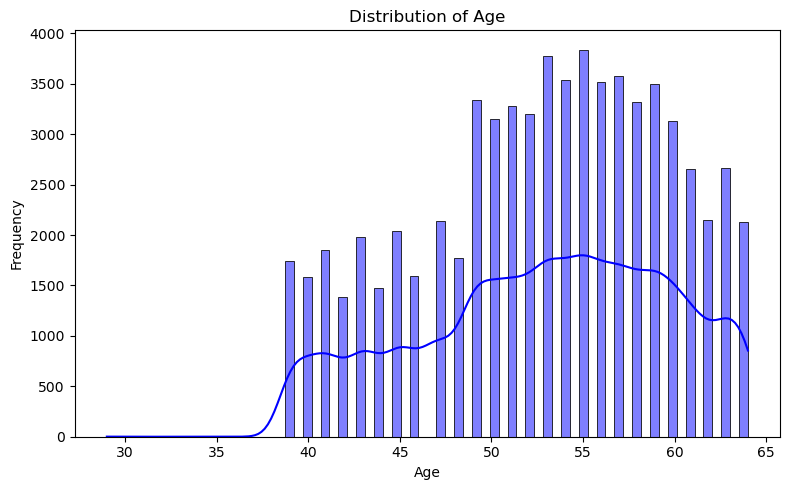

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


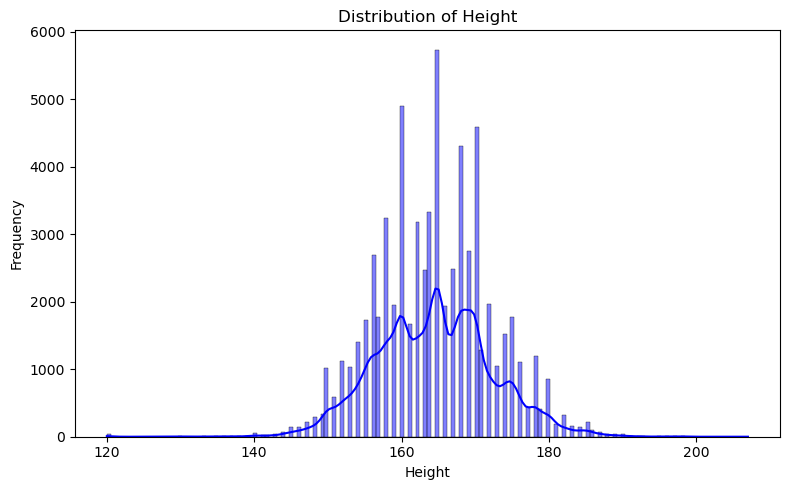

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


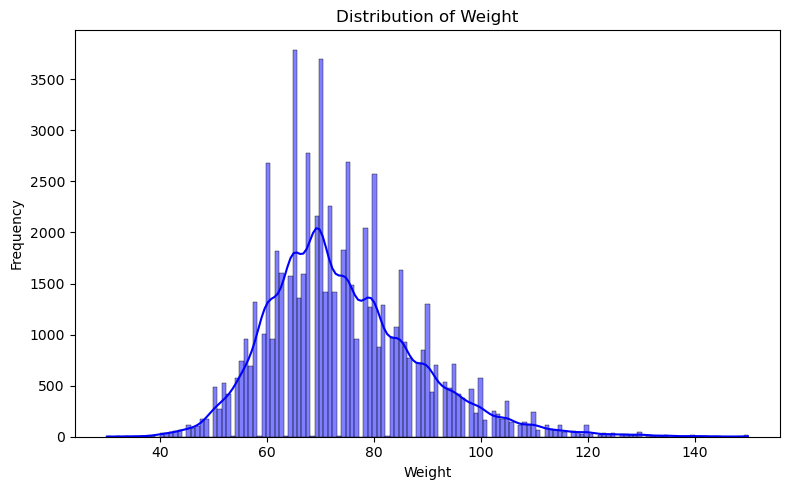

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


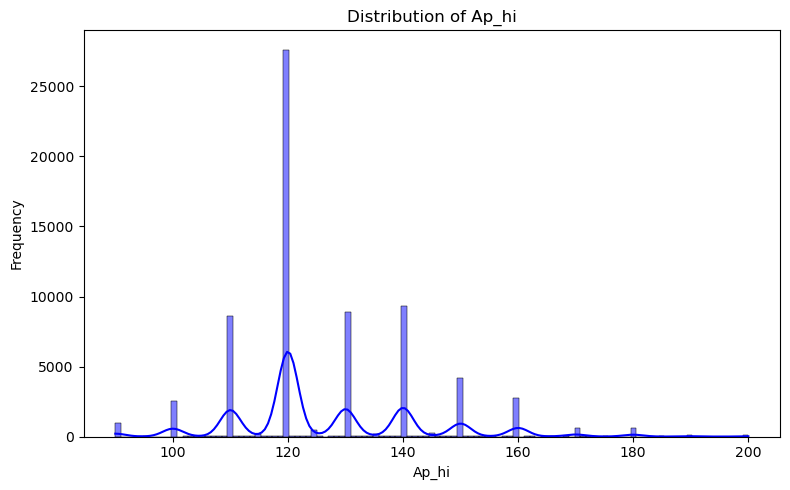

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


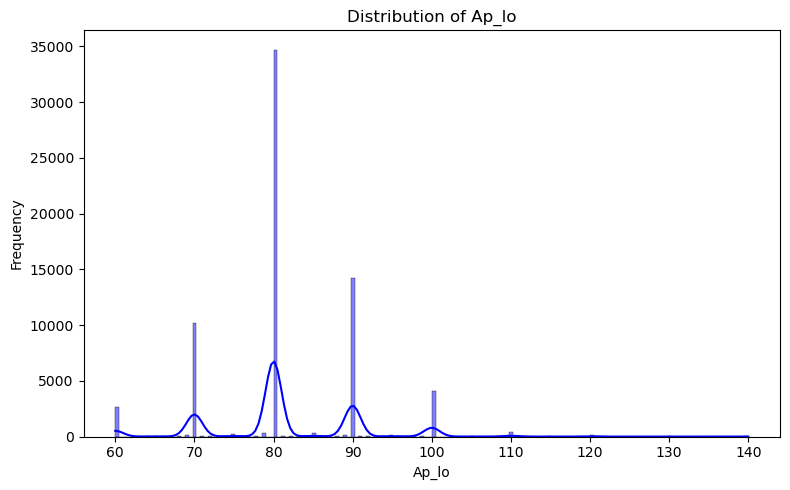

In [37]:
continuous_features = ["Age", "height", "weight", "ap_hi", "ap_lo"]
for feature in continuous_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data1[feature], kde=True, color='blue')
    plt.title(f"Distribution of {feature.capitalize()}")
    plt.xlabel(feature.capitalize())
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


In [79]:
#Count Plots 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


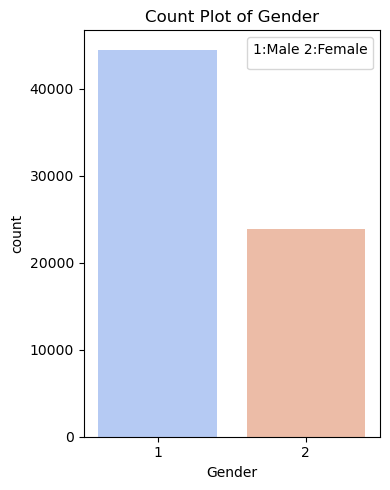

In [161]:
plt.figure(figsize=(4, 5))
sns.countplot(data=data1, x="gender", palette="coolwarm")
plt.title(f"Count Plot of Gender")
plt.xlabel("Gender")
plt.ylabel("count")
plt.legend(title="1:Male 2:Female")
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


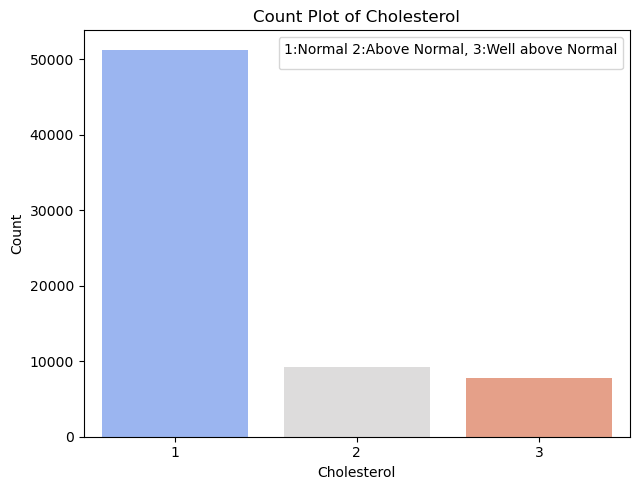

In [173]:
plt.figure(figsize=(6.5, 5))
sns.countplot(data=data1, x="cholesterol", palette="coolwarm")
plt.title(f"Count Plot of Cholesterol")
plt.xlabel("Cholesterol")
plt.ylabel("Count")
plt.legend(title="1:Normal 2:Above Normal, 3:Well above Normal")
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


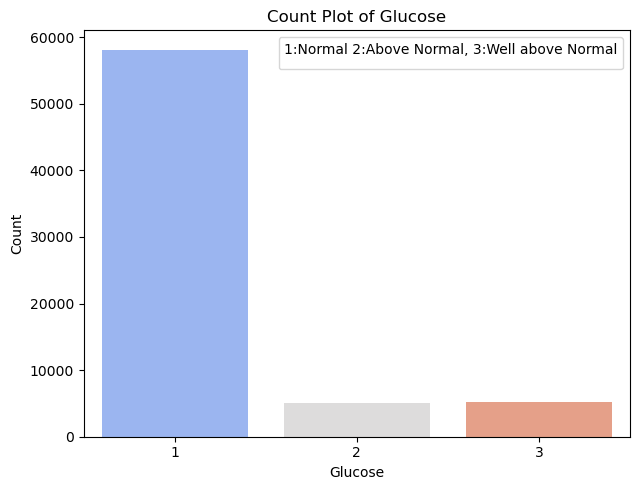

In [177]:
plt.figure(figsize=(6.5, 5))
sns.countplot(data=data1, x="gluc", palette="coolwarm")
plt.title(f"Count Plot of Glucose")
plt.xlabel("Glucose")
plt.ylabel("Count")
plt.legend(title="1:Normal 2:Above Normal, 3:Well above Normal")
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


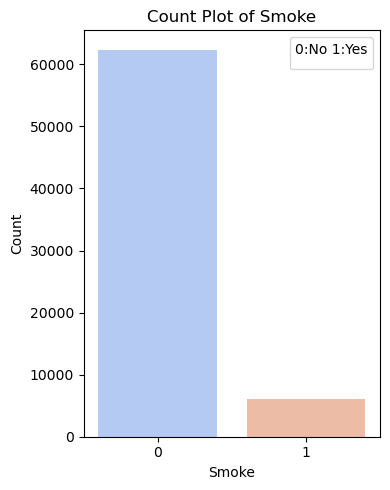

In [167]:
plt.figure(figsize=(4, 5))
sns.countplot(data=data1, x="smoke", palette="coolwarm")
plt.title(f"Count Plot of Smoke")
plt.xlabel("Smoke")
plt.ylabel("Count")
plt.legend(title="0:No 1:Yes")
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


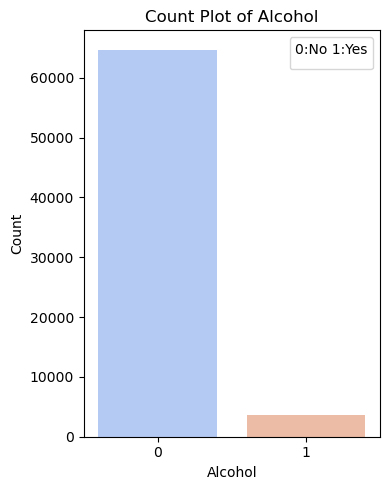

In [179]:
plt.figure(figsize=(4, 5))
sns.countplot(data=data1, x="alco", palette="coolwarm")
plt.title(f"Count Plot of Alcohol")
plt.xlabel("Alcohol")
plt.ylabel("Count")
plt.legend(title="0:No 1:Yes")
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


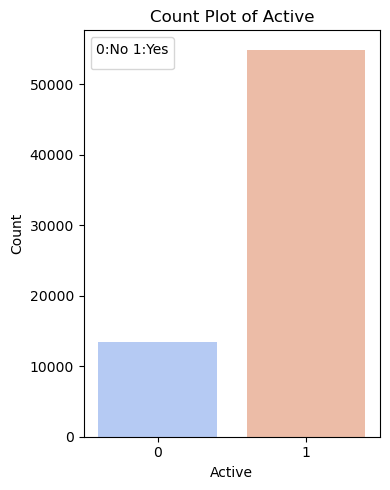

In [181]:
plt.figure(figsize=(4, 5))
sns.countplot(data=data1, x="active", palette="coolwarm")
plt.title(f"Count Plot of Active")
plt.xlabel("Active")
plt.ylabel("Count")
plt.legend(title="0:No 1:Yes")
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


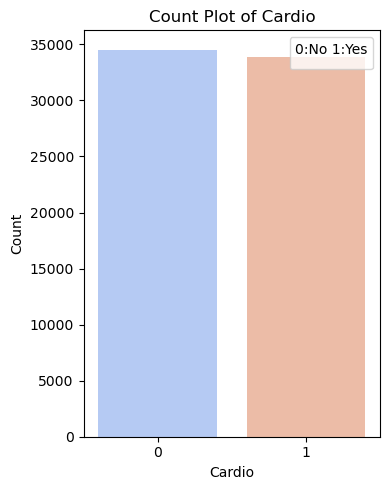

In [183]:
plt.figure(figsize=(4, 5))
sns.countplot(data=data1, x="cardio", palette="coolwarm")
plt.title(f"Count Plot of Cardio")
plt.xlabel("Cardio")
plt.ylabel("Count")
plt.legend(title="0:No 1:Yes")
plt.tight_layout()
plt.show()

In [107]:
#Scatter Plots for Continuous Variables Against Target

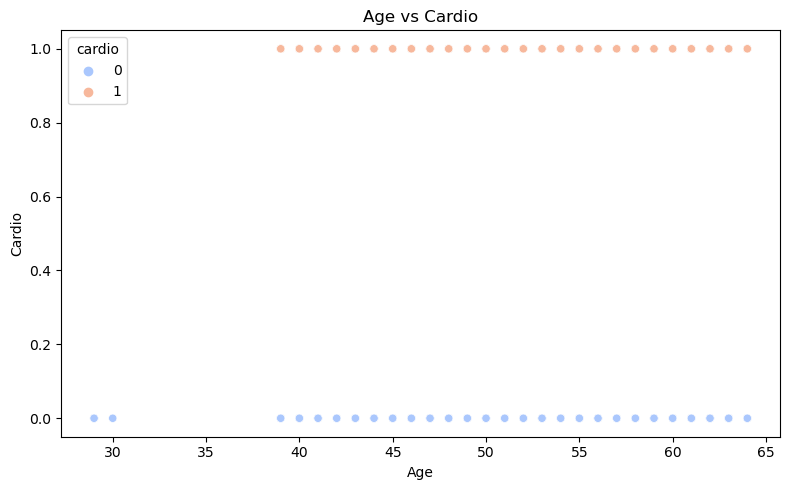

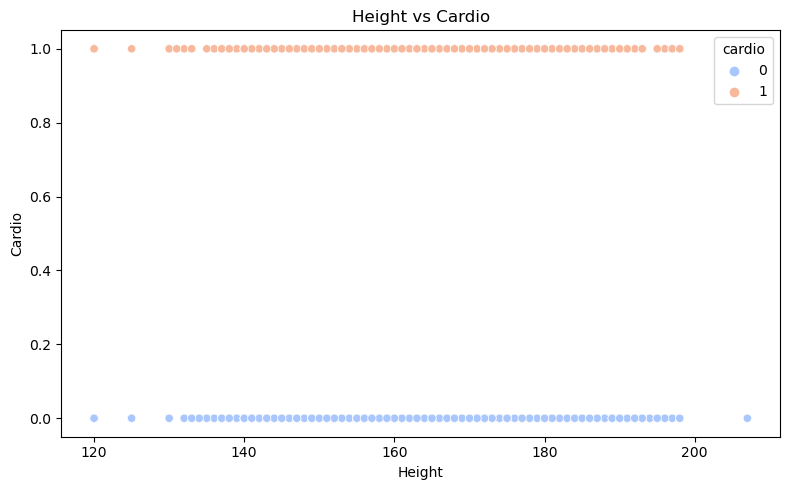

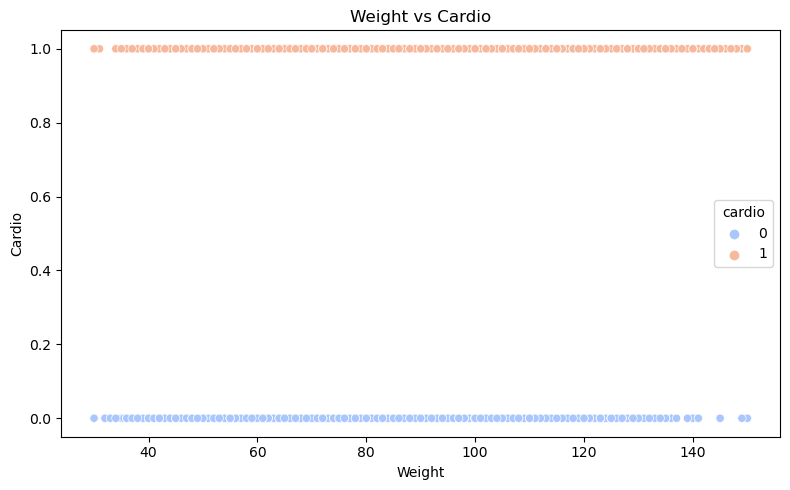

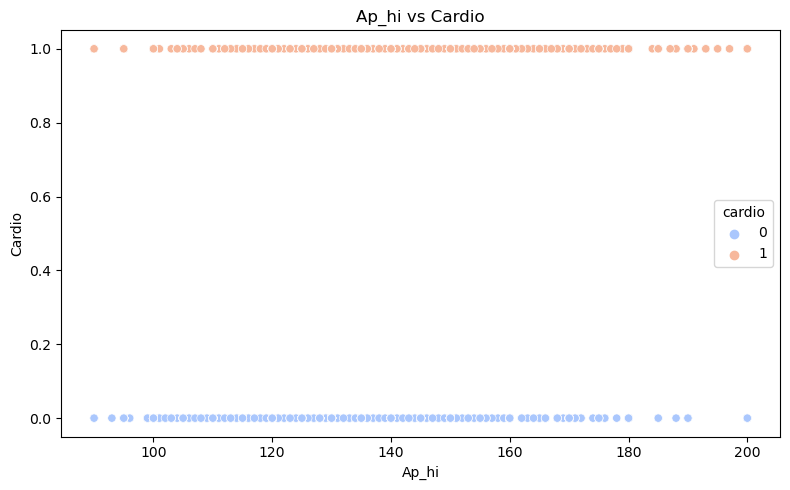

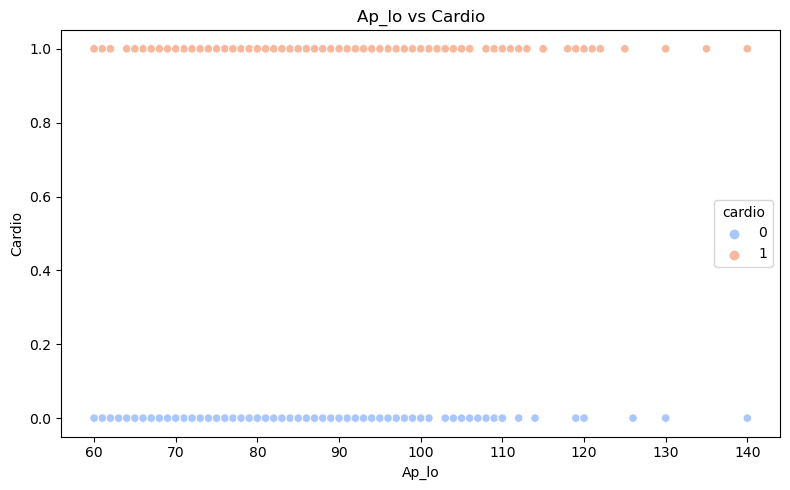

In [38]:
for feature in continuous_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=data1, x=feature, y="cardio", hue="cardio", palette="coolwarm")
    plt.title(f"{feature.capitalize()} vs Cardio")
    plt.xlabel(feature.capitalize())
    plt.ylabel("Cardio")
    plt.tight_layout()
    plt.show()

In [ ]:
#Box Plots to Analyze Outliers

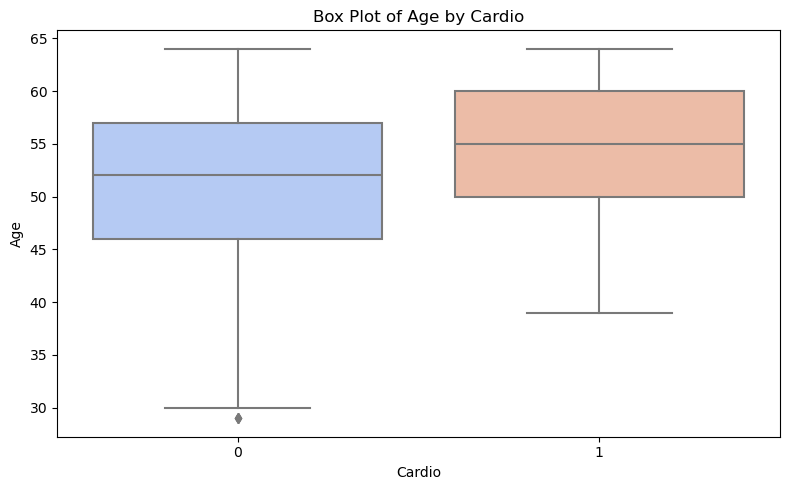

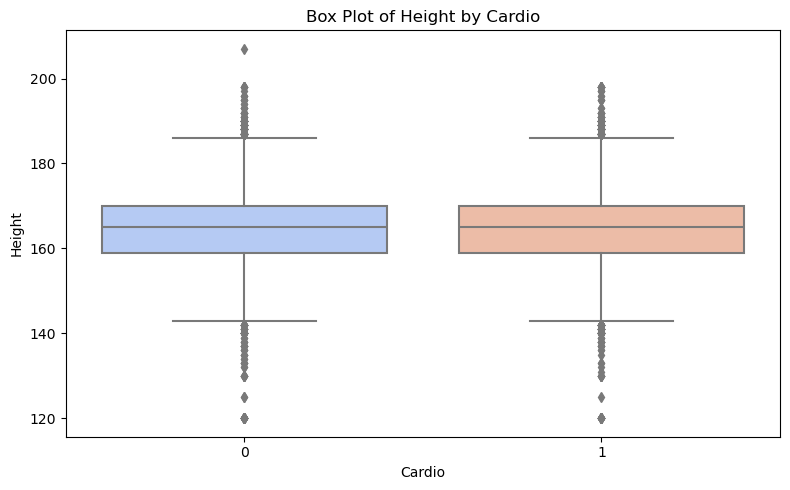

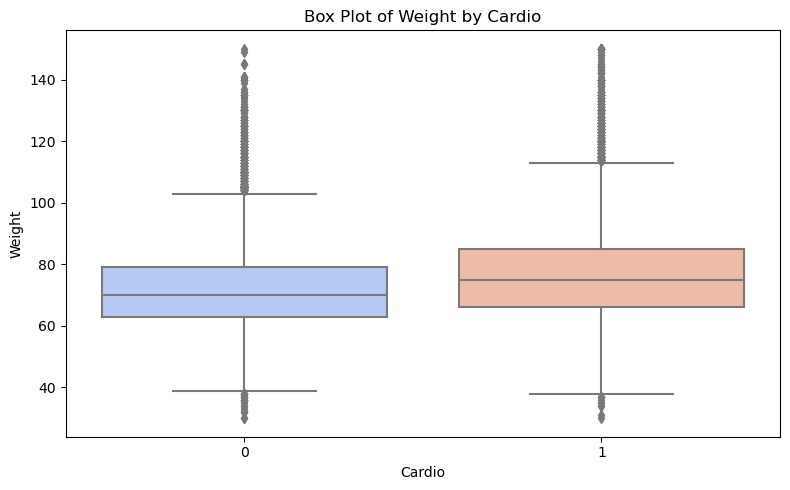

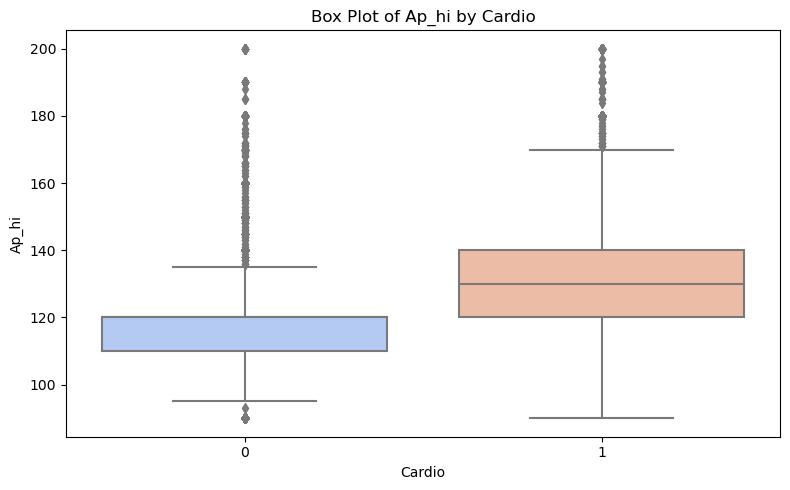

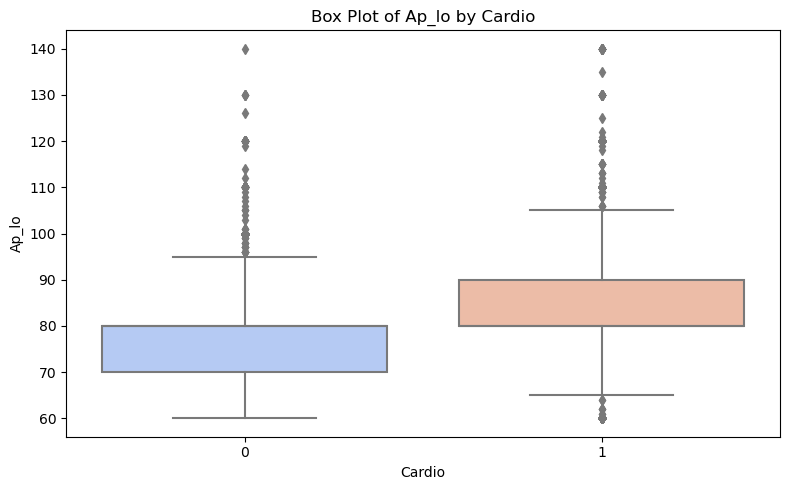

In [41]:
for feature in continuous_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=data1, x="cardio", y=feature, palette="coolwarm")
    plt.title(f"Box Plot of {feature.capitalize()} by Cardio")
    plt.xlabel("Cardio")
    plt.ylabel(feature.capitalize())
    plt.tight_layout()
    plt.show()

In [ ]:
#correlation matrix of features

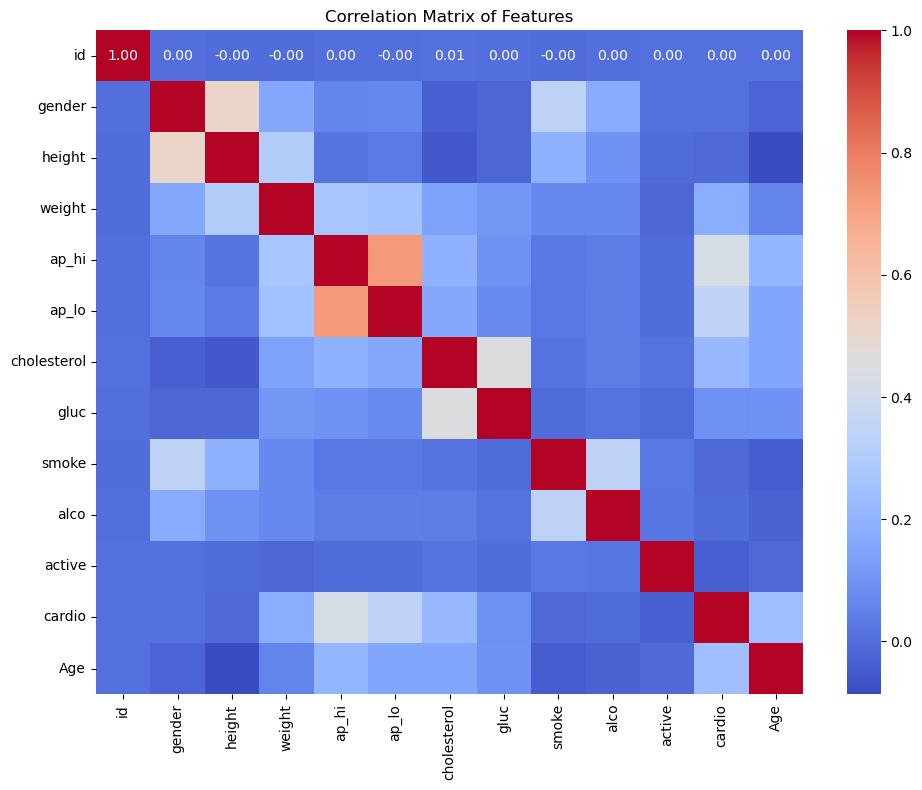

In [45]:
correlation_matrix = data1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.tight_layout()
plt.show()

In [115]:
#Model Training and Accuracy Evaluation

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [45]:
# Features and Target

In [61]:
x = data1.drop(columns=["id", "cardio"])
y = data1["cardio"]

In [63]:
x.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,Age
0,2,168,62.0,110,80,1,1,0,0,1,50
1,1,156,85.0,140,90,3,1,0,0,1,55
2,1,165,64.0,130,70,3,1,0,0,0,51
3,2,169,82.0,150,100,1,1,0,0,1,48
4,1,156,56.0,100,60,1,1,0,0,0,47


In [65]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: cardio, dtype: int64

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8,random_state=42)

In [69]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [71]:
len(x_train_scaled)

54689

In [73]:
len(x_test_scaled)

13673

In [ ]:
# Initialize Models

In [77]:
models = {
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}

In [61]:
#Training and Evaluateing Models

In [79]:
accuracy_scores = {}

In [81]:
for model_name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy

In [99]:
# Displaying Accuracy Scores

In [83]:
for model, acc in accuracy_scores.items():
    print(f"{model}: {acc:.2f}")

Support Vector Machine: 0.74
K-Nearest Neighbors: 0.70
Decision Tree: 0.64
Logistic Regression: 0.73
Random Forest: 0.71


In [96]:
# Machine learning model for heart disease detection (Support Vector Machine as per result )

In [85]:
model = SVC()
model.fit(x_train_scaled, y_train)

SVC()

In [105]:
model.predict([[45,1,165,60.0,75,75,1,1,0,0,0]])

array([1], dtype=int64)

In [87]:
ans=model.predict(x_test_scaled)

In [89]:
ans

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [91]:
model.score(x_test_scaled,y_test)

0.7353177795655672

In [95]:
accuracy = accuracy_score(y_test, model.predict(x_test_scaled))
print(f"\n Support Vector Machine Model Accuracy: {accuracy:.2f}")


 Support Vector Machine Model Accuracy: 0.74


In [101]:
model.predict([[1,165,60.0,75,75,1,1,0,0,0,45]])

array([1], dtype=int64)